In [ ]:
# MOUNT GOOGLE DRIVE 
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Local Run
jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0

# Figures

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
#online run
PARENT_DIR = 'C:/Users/reemb/content/drive/MyDrive/ReemSharedPhD/SharedCode/TOIS_paper_code/'

DIR = PARENT_DIR
fig_path = PARENT_DIR + 'results/figs/'

In [ ]:
subtitles_cnt_col_names = ['(a) Dataset = CLEF2017 | target_recall = 0.8', '(b) Dataset = CLEF2017 | target_recall = 0.9' , '(c) Dataset = CLEF2017 | target_recall = 1.0', 
                           '(d) Dataset = CLEF2018 | target_recall = 0.8', '(e) Dataset = CLEF2018 | target_recall = 0.9' , '(f) Dataset = CLEF2018 | target_recall = 1.0', 
                           '(g) Dataset = CLEF2019 | target_recall = 0.8', '(h) Dataset = CLEF2019 | target_recall = 0.9' , '(i) Dataset = CLEF2019 | target_recall = 1.0', 
                           '(j) Dataset = TR | target_recall = 0.8', '(k) Dataset = TR | target_recall = 0.9' , '(l) Dataset = TR | target_recall = 1.0', 
                           '(m) Dataset = Legal | target_recall = 0.8', '(n) Dataset = Legal | target_recall = 0.9' , '(o) Dataset = Legal | target_recall = 1.0' ]

In [ ]:

df_figures_all = pd.read_csv(DIR+'results/resultsForFigure_baselines_adapted-TM_IP-H.csv')

df_figures_all

,#,target_recall,Dataset,model,recall,cost,reliability,loss_er,rel_err
0,1,1.0,CLEF2017,OR,1.000,0.133,1.000,0.005,0.000
1,2,1.0,CLEF2017,TM,0.978,0.614,0.567,0.292,0.022
2,3,1.0,CLEF2017,TM-adapted,1.000,0.988,1.000,0.468,0.010
3,4,1.0,CLEF2017,Knee,0.998,0.291,0.833,0.041,0.002
4,5,1.0,CLEF2017,SCAL,0.984,0.659,0.700,0.253,0.016
...,...,...,...,...,...,...,...,...,...
110,31,0.8,Legal,SCAL,0.039,0.005,0.000,0.924,0.952
111,32,0.8,Legal,SD-training,1.000,1.000,1.000,0.007,0.250
112,33,0.8,Legal,SD-sampling,1.000,1.000,1.000,0.007,0.250
113,34,0.8,Legal,AutoStop,0.684,0.794,0.000,0.105,0.145


In [ ]:
df_figures_all.model.unique()

array(['OR', 'TM', 'TM-adapted', 'Knee', 'SCAL', 'SD-training',
       'SD-sampling', 'AutoStop', 'IP-H'], dtype=object)

## Baselines vs IP-H Grid Figure

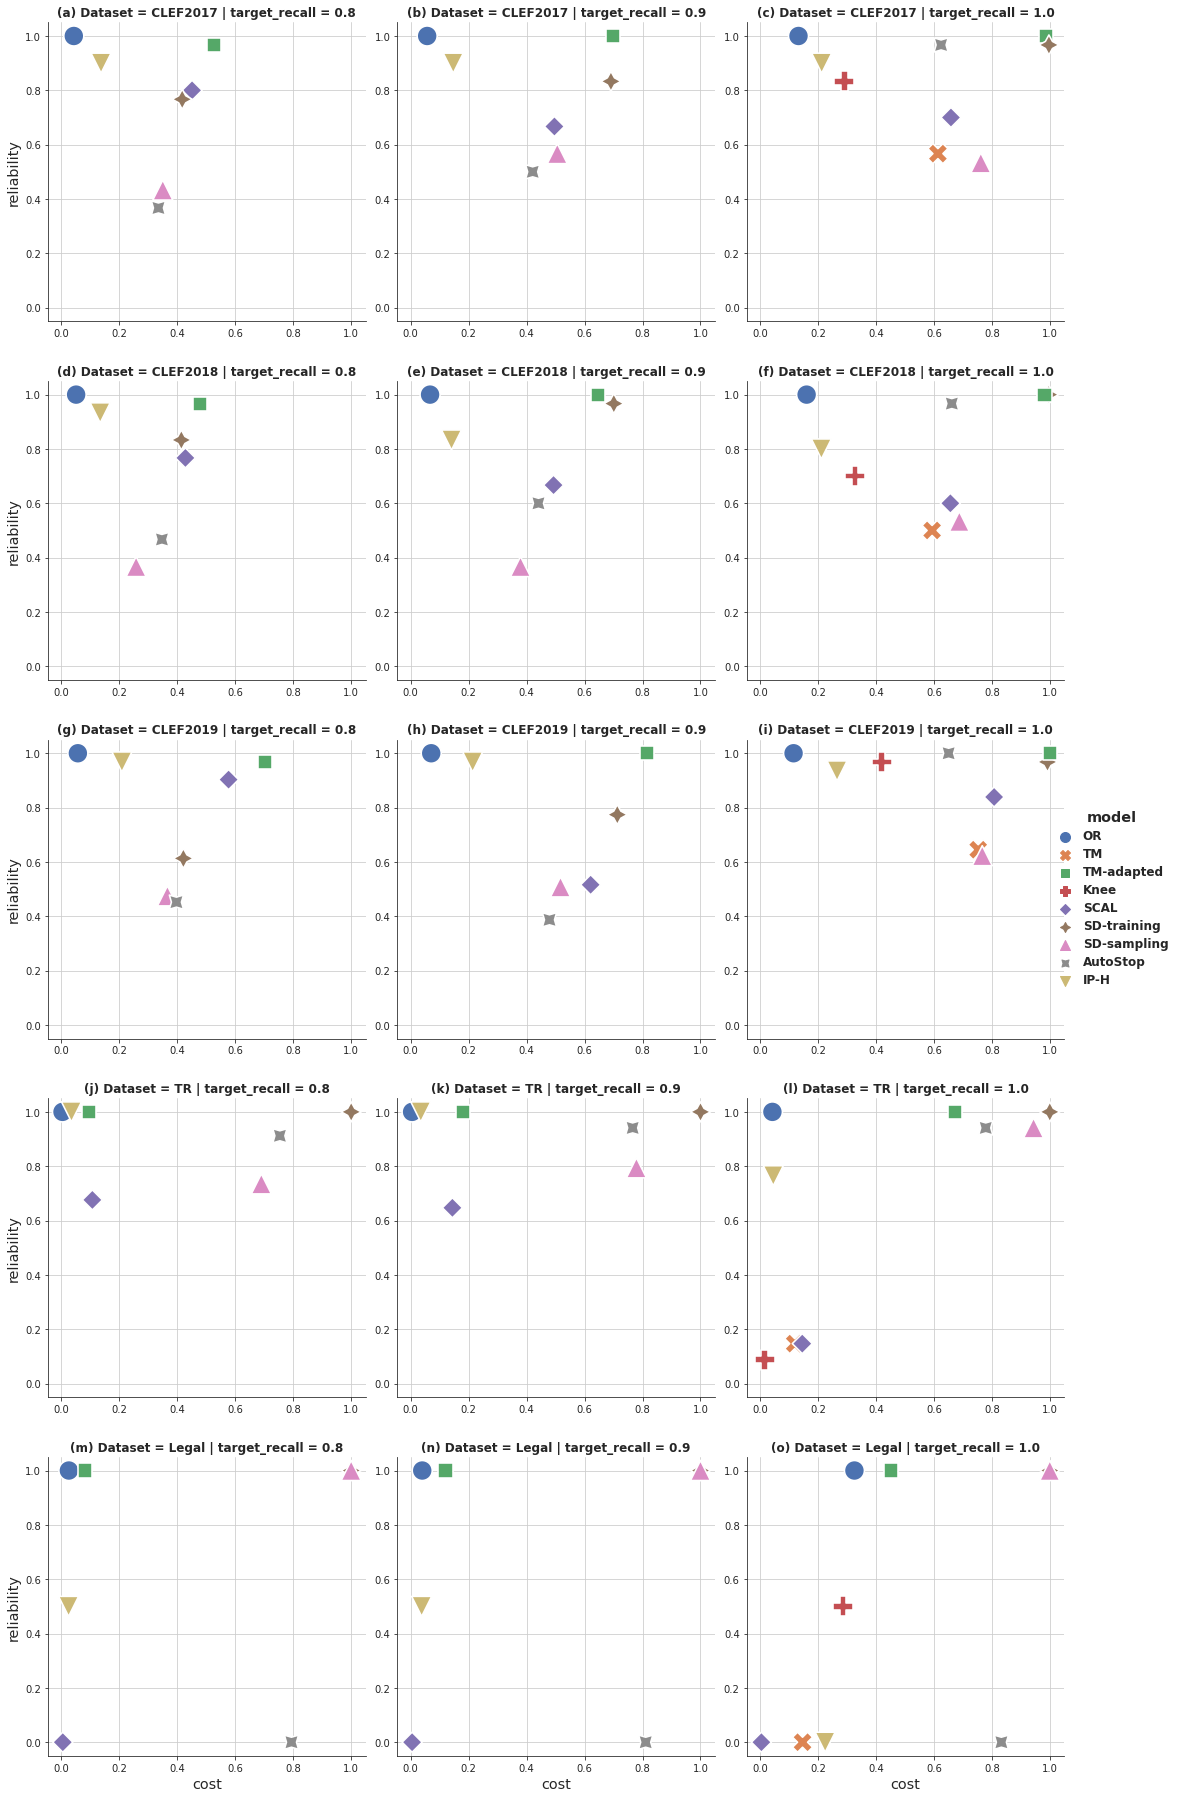

In [ ]:
# add grid
sns.set_style("ticks",{'axes.grid' : True})

g = sns.relplot(
    data=df_figures_all, y='reliability', x='cost',
    row="Dataset", col="target_recall",
    hue="model", style="model",palette="deep",
    kind="scatter", s=400,
)

#repeat labels for each facet
for axis in g.axes.flat:
    axis.tick_params(labelleft=True, labelbottom=True)
    #axis.tick_params(labelbottom=True)


# add spaces between facets after adding labels
plt.subplots_adjust(hspace=0.2, wspace=0.1)

#legend size
plt.setp(g._legend.get_title(), fontsize='x-large', weight='bold')
plt.setp(g._legend.get_texts(), fontsize='large', weight='bold')


#legend markers size 
for lh in g._legend.legendHandles: 
    lh.set_sizes([100])


for ax, title in zip(g.axes.flat, subtitles_cnt_col_names):
    ax.set_title(title)

# font size
for ax, title in zip(g.axes.flat, subtitles_cnt_col_names):
    ax.set_title(title, fontsize='large', weight='bold')
    ax.set_xlabel('cost',fontsize='x-large')
    ax.set_ylabel('reliability',fontsize='x-large') 



g.savefig(fig_path+ 'all_col_IP-H_adapted_TM.pdf')

